In [33]:
import matplotlib.font_manager as font_manager
from descartes import PolygonPatch
from time import time
import alphashape
import seaborn as sns
from shapely.ops import cascaded_union, polygonize, unary_union
from shapely.geometry import LinearRing
from shapely.geometry import Point, MultiPoint
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon
from geopandas import GeoSeries
import numpy as np
import os
import pandas as pd
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import csv
from shapely import LineString
import pickle
from collections import Counter
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import momepy
import networkx as nx
# from contextily import add_basemap
from libpysal import weights
from descartes import PolygonPatch
from time import time
import alphashape
import seaborn as sns
from shapely.ops import cascaded_union, polygonize, unary_union

fontsize = 20
# fontsize_ax_ticks = 25
# fontsize_legend = 25
figsize = (15, 10)
font = 'Times New Roman'

resultpath = 'results/'
network_polygon = '../../data/network/QGIS_Project/referentiel-comptages-edit.shp'

In [34]:
class ResampledMFD():
    def __init__(self, ldd, p_sample: float, n_combinations: int):
        self.ldd = ldd
        self.p_sample = p_sample
        self.n_combinations = n_combinations

    def compute_resampled_mfd(self):
        self.resampled_mfd = ResampledMFD.resample_mfd(
            self.ldd, self.p_sample, self.n_combinations)
        resampled_mfd_envelope, capacity, critical_occupancy = ResampledMFD.get_resampled_mfd_envelope(
            self.resampled_mfd)
        self.resampled_mfd_envelope = resampled_mfd_envelope
        self.capacity = capacity
        self.critical_occupancy = critical_occupancy
        return

In [35]:
import pickle


    
# with open('../resampling_mfd/output/resampled_mfd_[1, 2, 3, 4]_2010_q95.pkl', 'rb') as f:
#     resampled_mfd_district_1_2010 = pickle.load(f)
    
# with open('../resampling_mfd/output/resampled_mfd_[1, 2, 3, 4]_2023_q95.pkl', 'rb') as f:
#     resampled_mfd_district_1_2023 = pickle.load(f)

In [36]:
def plot_mfds_for_district(district: str, mfd_2010: ResampledMFD, mfd_2022: ResampledMFD, p_sample, n_combinations):
    fig, ax = plt.subplots(figsize=(15, 10))
    # plt.gcf().set_size_inches(4, 3) 
    plt.scatter(mfd_2010.resampled_mfd['occupancy'],
                mfd_2010.resampled_mfd['flow'], s=0.5, color='grey', label='Resampled MFD 2010')
    plt.hlines(y=mfd_2010.capacity, xmin=0, xmax=mfd_2010.critical_occupancy, color='orange',
               linestyle='-')
    plt.vlines(x=mfd_2010.critical_occupancy, ymin=0, ymax=mfd_2010.capacity, color='orange',
               linestyle='-')

    plt.scatter(mfd_2022.resampled_mfd['occupancy'],
                mfd_2022.resampled_mfd['flow'], s=0.5, color='darkgrey', label='Resampled MFD 2023')
    plt.hlines(y=mfd_2022.capacity, xmin=0, xmax=mfd_2022.critical_occupancy, color='blue',
               linestyle='-')
    plt.vlines(x=mfd_2022.critical_occupancy, ymin=0, ymax=mfd_2022.capacity, color='blue',
               linestyle='-')
    
    plt.scatter(mfd_2010.resampled_mfd_envelope['occupancy'], mfd_2010.resampled_mfd_envelope['flow'],
                marker='s', s=10, color='orange', label='MFD envelope 2010')
    plt.scatter(mfd_2022.resampled_mfd_envelope['occupancy'], mfd_2022.resampled_mfd_envelope['flow'],
                marker='s', s=10, color='blue', label='MFD envelope 2023')

    if district == '[13]':
        plt.xlim(0, 150)
        plt.ylim(0, 5800)
        plt.title('Resampled MFD (lane km) for district 1 in 2010 and 2023', font = font, fontsize = fontsize)
    # elif district == '2':
    #     plt.xlim(0, 120)
    #     plt.ylim(0, 8000)
    plt.title('Resampled MFD (lane km) for district ' + district + ' in 2010 and 2023', font = font, fontsize = fontsize)
    
    plt.xlabel('Density [veh/lane-km]', font = font, fontsize = fontsize)
    plt.ylabel('Flow [veh/lane-km/h]', font = font, fontsize = fontsize)
   
    plt.xticks(font = font, fontsize = fontsize)
    plt.yticks(font = font, fontsize = fontsize)
    font_legend = font_manager.FontProperties(family=font, style='normal', size=15)
    plt.legend(loc='upper right', prop = font_legend)
    
    # plt.savefig(resultpath + 'resampled_mfd_per_lane_km_district_' + district + "_" +
    #             str(p_sample) + "_" + str(n_combinations) + ".pdf", dpi=10, bbox_inches='tight')
    
    plt.show()


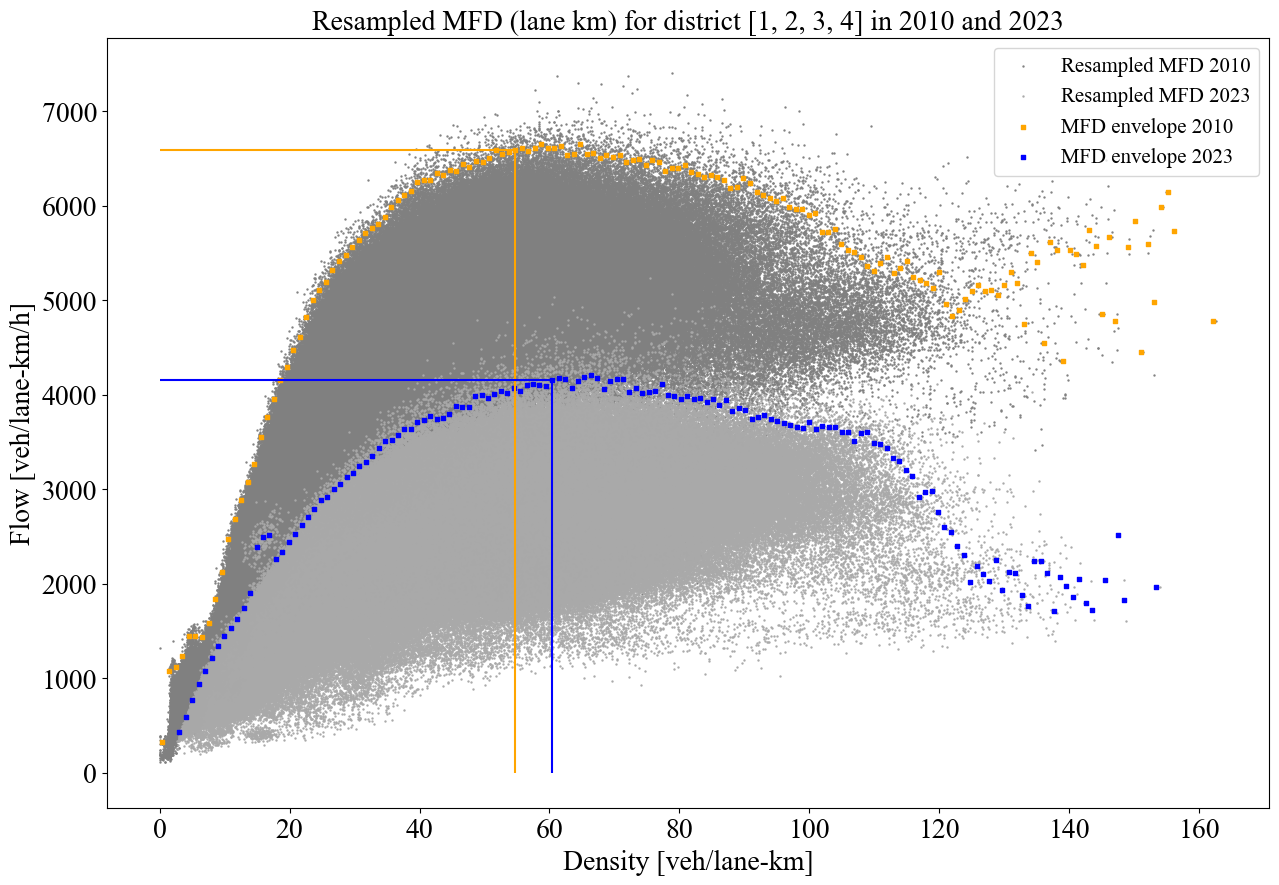

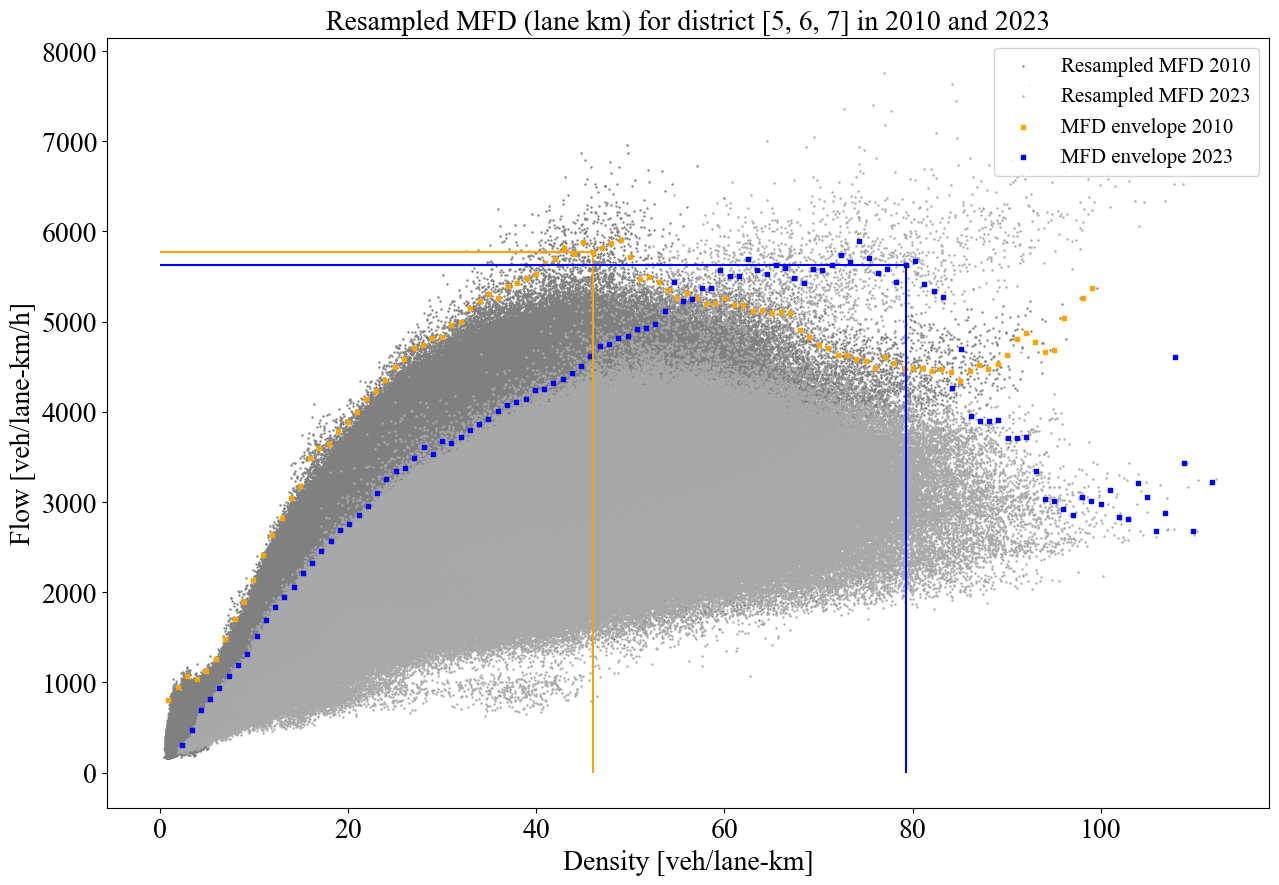

In [37]:
# districts_to_test = [[9], [10], [12], [13], [14], [15], [16], [17], [18], [19], [20]]
districts_to_test = [[1, 2, 3, 4], [5,6,7]]

for district in districts_to_test:
    district = str(district)
    with open('../resampling_mfd/output/resampled_mfd_' + district + '_2010_q95.pkl', 'rb') as f:
        resampled_mfd_district_2_2010 = pickle.load(f)
        
    with open('../resampling_mfd/output/resampled_mfd_' + district + '_2023_q95.pkl', 'rb') as f:
        resampled_mfd_district_2_2023 = pickle.load(f)

    plot_mfds_for_district(district, resampled_mfd_district_2_2010, resampled_mfd_district_2_2023, 0.3, 600)